In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Load and preprocess MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28*28)).astype("float32") / 255.0
test_images = test_images.reshape((10000, 28*28)).astype("float32") / 255.0

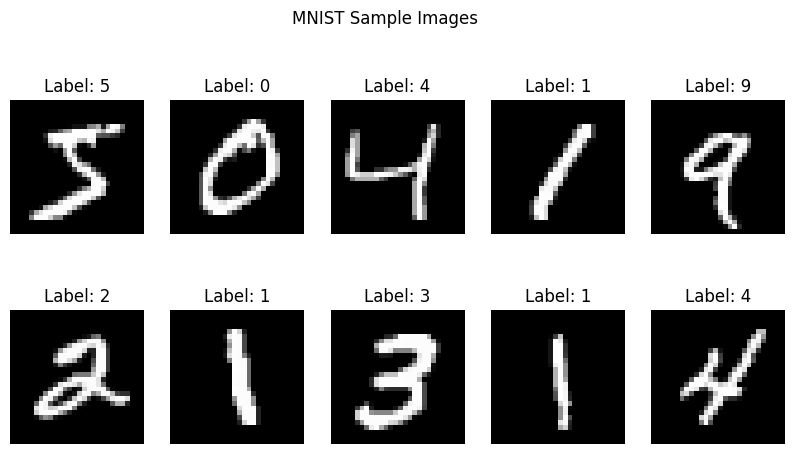

In [12]:
# Visualize training samples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.suptitle("MNIST Sample Images", y=1.02)
plt.show()

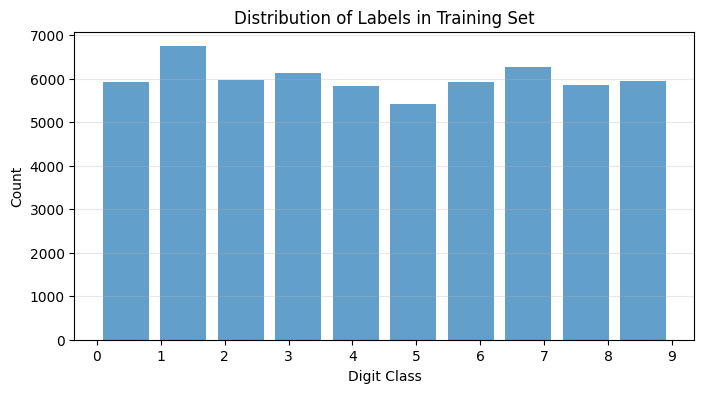

In [13]:
plt.figure(figsize=(8, 4))
plt.hist(train_labels, bins=10, rwidth=0.8, alpha=0.7)
plt.xticks(range(10))
plt.title("Distribution of Labels in Training Set")
plt.xlabel("Digit Class")
plt.ylabel("Count")
plt.grid(axis="y", alpha=0.3)
plt.show()

In [14]:
# Define model with more layers (as experimentation)
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28*28,)),
    layers.Dense(256, activation='tanh'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.8807 - loss: 0.3978 - val_accuracy: 0.9645 - val_loss: 0.1108
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9749 - loss: 0.0833 - val_accuracy: 0.9698 - val_loss: 0.0923
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9842 - loss: 0.0519 - val_accuracy: 0.9775 - val_loss: 0.0703
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9891 - loss: 0.0345 - val_accuracy: 0.9777 - val_loss: 0.0716
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9909 - loss: 0.0266 - val_accuracy: 0.9775 - val_loss: 0.0784
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9928 - loss: 0.0220 - val_accuracy: 0.9800 - val_loss: 0.0781
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9940 - loss: 0.0186 - val_accuracy: 0.9791 - val_loss: 0.0780
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9942 - loss: 0.0176 - v

In [17]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9751 - loss: 0.1145
Test Loss: 0.0931, Test Accuracy: 0.9796


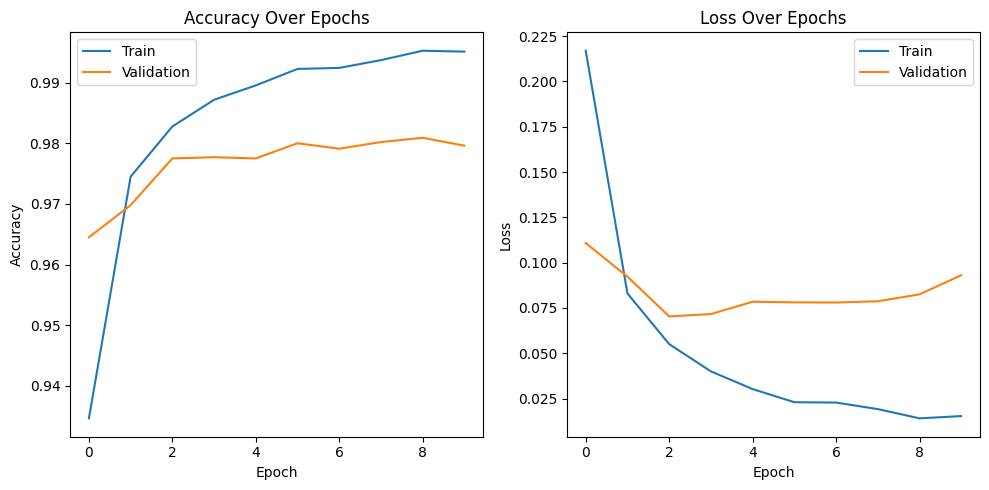

In [18]:
# Plot accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


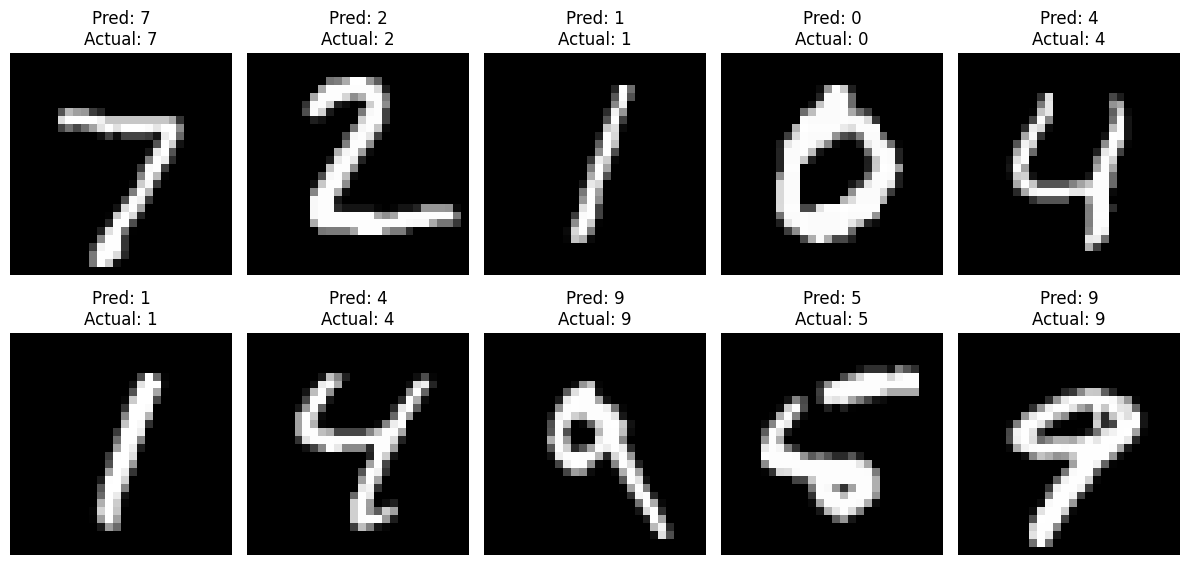

In [19]:
# Predict and visualize first 10 test images
predictions = model.predict(test_images[:10])
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nActual: {test_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()